# Projet: Analyse statistique des ventes de maisons

# Import des librairies

In [25]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.formula.api import ols
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Mode opératoire

0. Lecture et affichage du fichier
1. Analyse des variables (types, groupes de variables, hypothèse apriori)
2. Analyse de la variable cible
    2.1. distribution, hist, moyenne, médiane...
    2.2. relation visuelle entre variable cible et variable qui sembles importantes 
3. Analyse globale 
    3.1. matrice de correlation du sous ensemble (les 10 plus correlée), conclusion intermédiaire)
    3.2. travail sur ces variables les plus intéressantes == Analyse profonde du lien
4. Data cleaning: Standardisation, Dummies, outliers...
5. Data Viz
    5.1. PCA

# 0. Lecture et affichage du fichier

In [4]:
data = pd.read_csv("train.csv")

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
data.set_index("Id", inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# 1. Analyse des variables

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

# 2. Analyse de la varible cible 'Sale Price'

# 2. 1. Distribution et statistiques 

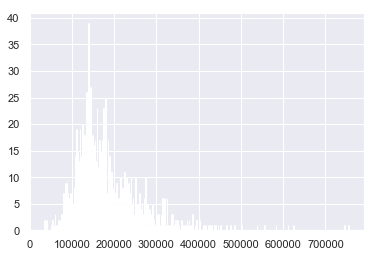

In [8]:
data['SalePrice'].hist(bins=500)

In [9]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# 2. 2. Relation visuelle  

# 2.2.1. Variables numériques 

In [10]:
data_numeric = data.select_dtypes(exclude=['object'])
data_numeric.head()

# 2.2.1.1 Corrélations 

In [13]:
table_correlation = data_numeric.corr()

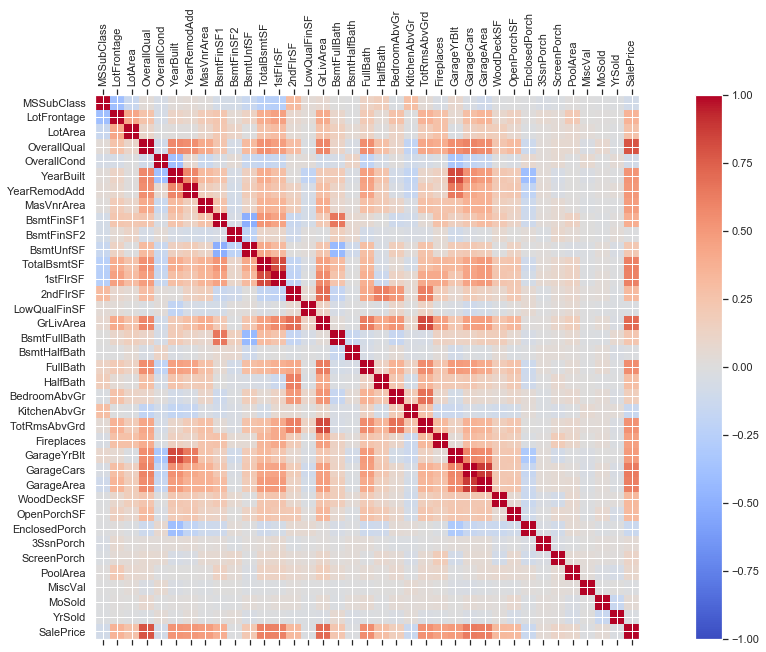

In [11]:
#Représentation graphique des correlations entre les variables numériques
corr = data_numeric.corr()
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data_numeric.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data_numeric.columns)
ax.set_yticklabels(data_numeric.columns)
plt.show()

In [12]:
#Récupération des variables fortement correlée avec le prix de vente
table_correlation[(table_correlation['SalePrice']>0.5) | (table_correlation['SalePrice']<(-0.5))]['SalePrice']

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

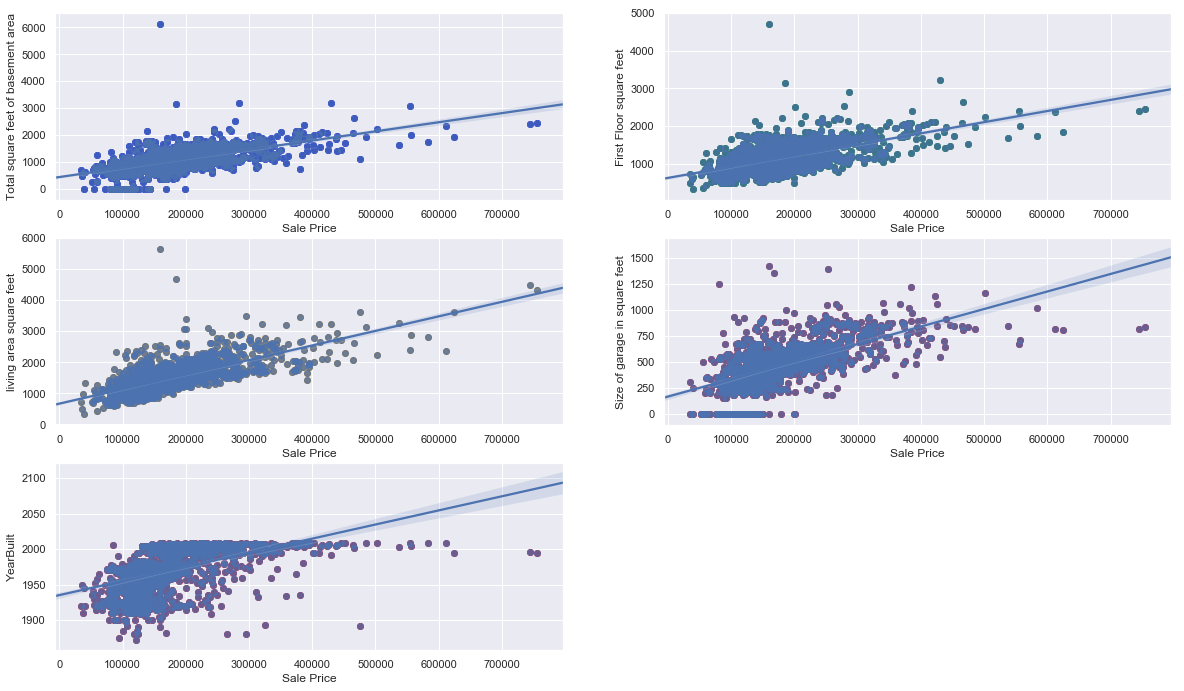

In [26]:
#Représentation graphiques en scatter plot des relations entres Sale Price et les variables d'intérets

x = data_numeric['SalePrice']

plt.figure(1, figsize=(20,20))


plt.subplot(5, 2, 1)
plt.scatter(x,y=data_numeric['TotalBsmtSF'], color = 'blue')
sns.regplot(x, data_numeric['TotalBsmtSF'])
plt.xlabel("Sale Price")
plt.ylabel("Total square feet of basement area")

plt.subplot(5, 2, 2)
plt.scatter(x,y=data_numeric['1stFlrSF'], color = 'green')
sns.regplot(x, data_numeric['1stFlrSF'])
plt.xlabel("Sale Price")
plt.ylabel("First Floor square feet")

plt.subplot(5, 2, 3)
plt.scatter(x,y=data_numeric['GrLivArea'], color = 'orange')
sns.regplot(x, data_numeric['GrLivArea'])
plt.xlabel("Sale Price")
plt.ylabel("living area square feet")

plt.subplot(5, 2, 4)
plt.scatter(x,y=data_numeric['GarageArea'], color = 'red')
sns.regplot(x, data_numeric['GarageArea'])
plt.xlabel("Sale Price")
plt.ylabel("Size of garage in square feet")


plt.subplot(5, 2, 5)
plt.scatter(x,y=data_numeric['YearBuilt'], color = 'red')
sns.regplot(x, data_numeric['YearBuilt'])
plt.xlabel("Sale Price")
plt.ylabel("YearBuilt")

plt.show()

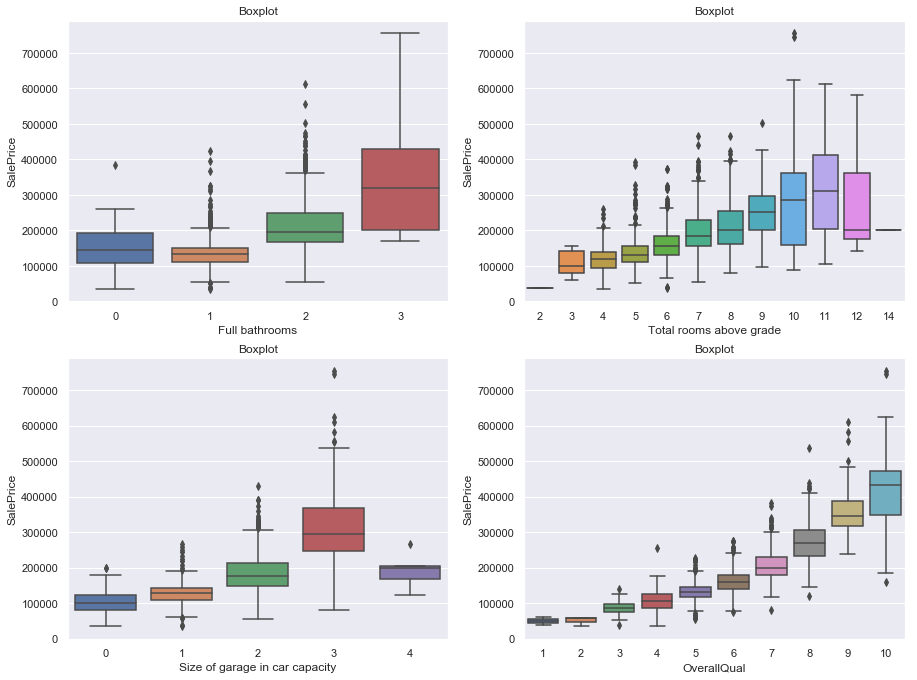

In [16]:
#Représentation graphiques en box plot des relations entres Sale Price et les variables d'intérets

plt.figure(1, figsize=(15,30))
plt.subplot(5, 2, 1)
ax = sns.boxplot(x="FullBath", y="SalePrice", data=data_numeric)
ax.set_xlabel("Full bathrooms")
ax.set_title("Boxplot")

plt.subplot(5, 2, 2)
ax = sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=data_numeric)
ax.set_xlabel("Total rooms above grade")
ax.set_title("Boxplot")

plt.subplot(5, 2, 3)
ax = sns.boxplot(x="GarageCars", y="SalePrice", data=data_numeric)
ax.set_xlabel("Size of garage in car capacity")
ax.set_title("Boxplot")

plt.subplot(5, 2, 4)
ax = sns.boxplot(x="OverallQual", y="SalePrice", data=data_numeric)
ax.set_xlabel("OverallQual")
ax.set_title("Boxplot")


plt.show()


# 2.2.2. Variable "Object"

In [18]:
#DF avec les colonnes object afin de travailler sur les catégories 
data_object = data.select_dtypes(include=['object']).copy()


In [19]:
#transformation des NaN en No avant
data_object = data_object.fillna("No")
data_object.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,No,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
2,RL,Pave,No,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
3,RL,Pave,No,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
4,RL,Pave,No,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,No,No,No,WD,Abnorml
5,RL,Pave,No,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal


In [21]:
#je transforme le type en "categorie" afin de transformer ensuite en numérique

def category (df):
    for col in df:
        df[col] = df[col].astype("category").cat.codes
    return df

category(data_object)
data_object_sale_price = pd.concat([data_object, data['SalePrice']], axis=1)
data_object_sale_price.head()
data_object_sale_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 44 columns):
MSZoning         1460 non-null int8
Street           1460 non-null int8
Alley            1460 non-null int8
LotShape         1460 non-null int8
LandContour      1460 non-null int8
Utilities        1460 non-null int8
LotConfig        1460 non-null int8
LandSlope        1460 non-null int8
Neighborhood     1460 non-null int8
Condition1       1460 non-null int8
Condition2       1460 non-null int8
BldgType         1460 non-null int8
HouseStyle       1460 non-null int8
RoofStyle        1460 non-null int8
RoofMatl         1460 non-null int8
Exterior1st      1460 non-null int8
Exterior2nd      1460 non-null int8
MasVnrType       1460 non-null int8
ExterQual        1460 non-null int8
ExterCond        1460 non-null int8
Foundation       1460 non-null int8
BsmtQual         1460 non-null int8
BsmtCond         1460 non-null int8
BsmtExposure     1460 non-null int8
BsmtFinType1     1460 non-nul

# 2.2.2.1 Corrélations

In [22]:
table_correlation_variale_cat = data_object_sale_price.corr()
table_correlation_variale_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
MSZoning,1.000000,0.087654,-0.368086,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.249679,-0.027874,...,0.117559,-0.162998,-0.102744,-0.100366,0.002882,-0.061289,-0.005553,0.097437,0.009494,-0.166872
Street,0.087654,1.000000,-0.001587,-0.010224,0.115995,0.001682,0.013960,-0.179360,-0.011561,-0.071657,...,0.002339,0.003559,0.007713,0.024521,-0.004067,-0.029386,-0.160748,0.014339,0.006064,0.041036
Alley,-0.368086,-0.001587,1.000000,-0.041920,0.023263,0.000647,-0.008167,0.015513,0.038922,0.073596,...,-0.064758,0.123545,0.126092,0.097880,-0.001564,0.044473,-0.054428,0.001092,-0.000162,0.083121
LotShape,0.061887,-0.010224,-0.041920,1.000000,0.085434,-0.036101,0.221102,-0.099951,-0.038894,-0.115003,...,0.189653,-0.118417,-0.096292,-0.113698,0.018156,-0.045633,-0.008090,-0.000911,-0.038118,-0.255580
LandContour,-0.017854,0.115995,0.023263,0.085434,1.000000,0.008238,-0.025527,-0.374267,0.019116,0.024801,...,-0.039882,0.041857,0.043414,0.140921,0.000731,-0.043773,0.011668,-0.025754,0.033809,0.015453
Utilities,-0.001192,0.001682,0.000647,-0.036101,0.008238,1.000000,-0.032589,-0.005909,0.046809,-0.000950,...,0.002710,0.008263,0.007732,0.007586,0.001657,0.011976,-0.004869,-0.126770,-0.089701,-0.014314
LotConfig,-0.009895,0.013960,-0.008167,0.221102,-0.025527,-0.032589,1.000000,-0.007256,-0.036597,0.021457,...,0.015048,0.003261,0.007176,-0.045058,0.054786,0.058067,-0.015821,0.014325,0.051579,-0.067396
LandSlope,-0.022055,-0.179360,0.015513,-0.099951,-0.374267,-0.005909,-0.007256,1.000000,-0.080405,-0.016762,...,0.015032,0.007741,-0.019890,-0.024538,0.014289,0.048263,0.051377,0.054858,-0.043095,0.051152
Neighborhood,-0.249679,-0.011561,0.038922,-0.038894,0.019116,0.046809,-0.036597,-0.080405,1.000000,-0.025401,...,-0.020061,0.024102,0.055799,0.040345,-0.002213,0.020601,-0.026767,-0.036956,0.021867,0.210851
Condition1,-0.027874,-0.071657,0.073596,-0.115003,0.024801,-0.000950,0.021457,-0.016762,-0.025401,1.000000,...,-0.104191,0.102768,0.061843,0.105864,-0.003311,0.046479,0.012339,-0.002338,0.057747,0.091155


In [13]:
table_correlation_variale_cat[(table_correlation_variale_cat['SalePrice']>0.5) | (table_correlation_variale_cat['SalePrice']<(-0.5))]['SalePrice']

ExterQual     -0.636884
BsmtQual      -0.593734
KitchenQual   -0.589189
SalePrice      1.000000
Name: SalePrice, dtype: float64

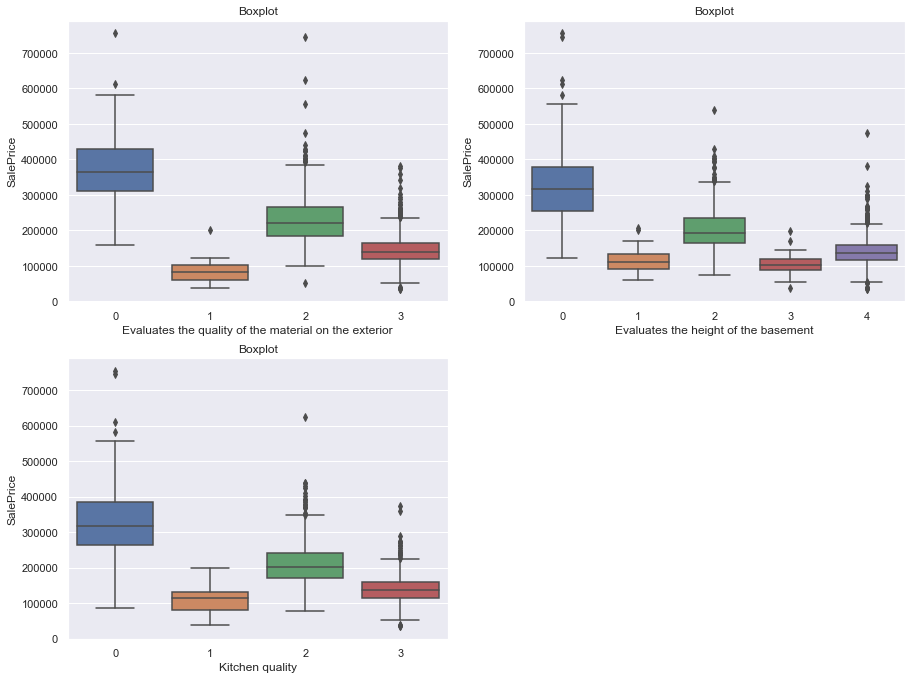

In [23]:
plt.figure(1, figsize=(15,30))
plt.subplot(5, 2, 1)
ax = sns.boxplot(x="ExterQual", y="SalePrice", data=data_object_sale_price)
ax.set_xlabel("Evaluates the quality of the material on the exterior")
ax.set_title("Boxplot")

plt.subplot(5, 2, 2)
ax = sns.boxplot(x="BsmtQual", y="SalePrice", data=data_object_sale_price)
ax.set_xlabel("Evaluates the height of the basement")
ax.set_title("Boxplot")

plt.subplot(5, 2, 3)
ax = sns.boxplot(x="KitchenQual", y="SalePrice", data=data_object_sale_price)
ax.set_xlabel("Kitchen quality")
ax.set_title("Boxplot")

plt.show()

In [33]:
model = ols('SalePrice ~ C(ExterQual)', data=data_object_sale_price).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(ExterQual),4.395744e+12,3.0,443.334831,1.439551e-204
Residual,4.812167e+12,1456.0,NaN,NaN


In [34]:
model = ols('SalePrice ~ C(BsmtQual)', data=data_object_sale_price).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(BsmtQual),4.281621e+12,4.0,316.148635,8.158548e-196
Residual,4.926290e+12,1455.0,NaN,NaN


In [35]:
model = ols('SalePrice ~ C(KitchenQual)', data=data_object_sale_price).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(KitchenQual),4.204320e+12,3.0,407.806352,3.032213e-192
Residual,5.003592e+12,1456.0,NaN,NaN


In [51]:
Y = data['SalePrice']
X = data_object_sale_price[['ExterQual','BsmtQual','KitchenQual', 'Neighborhood']]
 
scale = StandardScaler()
X_scaled = scale.fit_transform(X[['ExterQual','BsmtQual','KitchenQual', 'Neighborhood']].as_matrix())
X_scaled 
est = sm.OLS(Y, X).fit()
print (est.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1247.
Date:                Sat, 21 Sep 2019   Prob (F-statistic):               0.00
Time:                        15:18:32   Log-Likelihood:                -18789.
No. Observations:                1460   AIC:                         3.759e+04
Df Residuals:                    1456   BIC:                         3.761e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
ExterQual     4.622e+04   4310.868     10.721   

/Users/julieG/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys
/Users/julieG/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/julieG/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [20]:
X = sm.add_constant(data_object_sale_price['ExterQual']) # We must add the intercept using the add_constant function
Y = data.SalePrice

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     995.0
Date:                Sat, 21 Sep 2019   Prob (F-statistic):          6.42e-167
Time:                        14:50:21   Log-Likelihood:                -18164.
No. Observations:                1460   AIC:                         3.633e+04
Df Residuals:                    1458   BIC:                         3.634e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.661e+05   6085.044     60.161      0.0

In [20]:
encode = pd.get_dummies(data)
encode.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
